# EVALUACION

## 1. Preparacion de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#sns.pairplot(df)

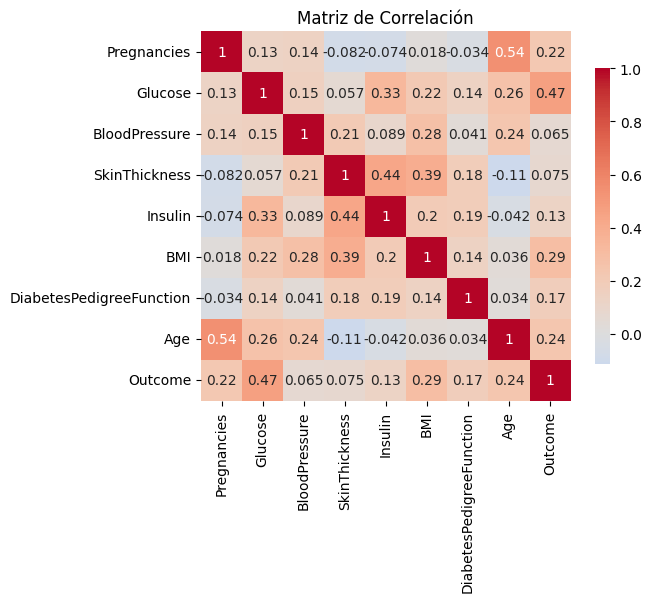

In [3]:
# Matriz de correlacion
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

# Reemplazar ceros por la media en columnas relevantes
df_clean = df.copy()
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df_clean[col] = df_clean[col].replace(0, df_clean[col].mean())

# Separar variables predictoras y variable objetivo
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Estandarizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 2. Separacion en conjunto de entrenamiento y prueba


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 3. Configuracion del algoritmo

In [6]:

# Entrenar el modelo
model = LinearRegression()



## 4. Entrenamiento del modelo

In [7]:
model.fit(X_train, y_train)



LinearRegression()

## 5. Prediccion

In [12]:
# Realizar predicciones

y_pred = model.predict(X_test)
print(y_pred)

[ 0.30616918  0.22471642  0.14321069  0.20931495  0.48565878  0.43065202
 -0.22361704  0.42450073  0.55065555  0.7101174   0.29294303  0.87780421
  0.40786675  0.33481404  0.0675618   0.39954104  0.13674088  0.05399341
  0.69468131  0.54804854  0.25355652  0.05905028  0.46847505  0.10292016
  0.53002708  0.86150739  0.1454634  -0.0752731   0.29538907  0.13842243
  0.88437657  0.8114394   0.7380658   0.63436713  0.54407973  0.64305319
  1.04004381  0.26884758  0.48743471  0.50348788  0.04277316  0.54847556
  0.50834548  0.35718947 -0.1098813   0.52097323  0.54902349  0.24233025
  0.37985995  1.02393285 -0.02907462  0.61945432  0.73589818  0.31598402
  0.14881928 -0.05898103  0.72118084 -0.01107155  0.42558511  0.7148603
  0.67079259  0.37159613  0.2797659   0.25540907  0.0534288   0.56181537
 -0.03946691  0.66993982 -0.05926446  0.66714284  0.6239223   0.02373066
  0.21279582  0.14036276  0.09911653  0.45906575  0.20129433  0.15832608
  0.17834938  0.28805162  0.62752845  0.18249453  0.

## 6. Evaluacion


In [9]:
# Obtener coeficientes y ecuación
coefficients = model.coef_
intercept = model.intercept_
features = X.columns

equation = "y = " + " + ".join([f"({coef:.4f} * {feat})" for coef, feat in zip(coefficients, features)]) + f" + ({intercept:.4f})"
print("Ecuación del modelo:\n", equation)


Ecuación del modelo:
 y = (0.0374 * Pregnancies) + (0.1975 * Glucose) + (-0.0250 * BloodPressure) + (-0.0013 * SkinThickness) + (-0.0282 * Insulin) + (0.1131 * BMI) + (0.0310 * DiabetesPedigreeFunction) + (0.0683 * Age) + (0.3507)


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")
print(f'Intercepto: {model.intercept_}')


Error cuadrático medio (MSE): 0.1649
Coeficiente de determinación (R²): 0.2816
Intercepto: 0.35071664476935976


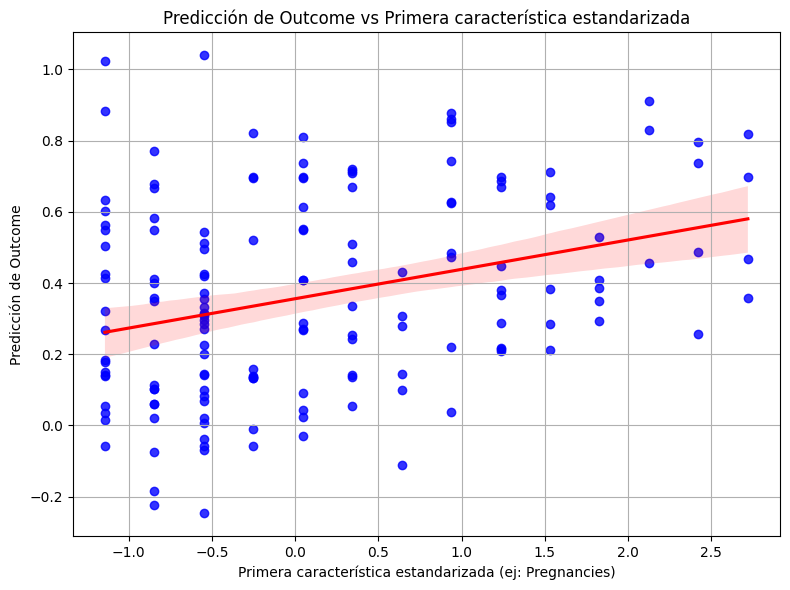

In [11]:
# Usamos la primera característica para graficar
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test[:, 0], y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Predicción de Outcome vs Primera característica estandarizada")
plt.xlabel("Primera característica estandarizada (ej: Pregnancies)")
plt.ylabel("Predicción de Outcome")
plt.grid(True)
plt.tight_layout()
plt.show()



### Interpretación de Resultados de la Regresión Lineal Múltiple

---

#### **1. Introducción al Dataset de Diabetes**

El dataset de diabetes de Kaggle contiene información sobre pacientes, con características como edad, índice de masa corporal (IBM), presión sanguínea, número de embarazos, entre otras. El objetivo es predecir la variable `Outcome`, que indica si un paciente tiene diabetes (1) o no (0), basado en las características proporcionadas.

---

#### **2. Tratamiento y Estandarización de Datos**

Antes de aplicar el algoritmo de regresión lineal múltiple, se realiza una serie de pasos de preprocesamiento:

* **Manejo de valores faltantes**: Se reemplazan los valores faltantes con la media de la columna correspondiente.
* **Estandarización**: Dado que las variables pueden estar en diferentes escalas (por ejemplo, edad vs. IMC), se estandarizan los datos para que todas las características tengan una media de 0 y una desviación estándar de 1. Esto es fundamental para mejorar el rendimiento del modelo.

---

#### **3. Implementación de las Etapas del Algoritmo de ML**

* **Selección de características**: Se utilizan todas las características disponibles (edad, IMC, número de embarazos, etc.) para predecir `Outcome`.
* **División del dataset**: Se divide el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) para evaluar la precisión del modelo.
* **Modelo de regresión lineal múltiple**: Se entrena el modelo utilizando el conjunto de entrenamiento.
* **Evaluación del modelo**: Se evalúa el rendimiento utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).

---

#### **4. Ecuación del Modelo de Regresión Lineal Múltiple**

El modelo de regresión lineal múltiple se expresa de la siguiente manera:

$$
\text{Outcome} = \beta_0 + \beta_1 \cdot \text{Feature1} + \beta_2 \cdot \text{Feature2} + \dots + \beta_n \cdot \text{FeatureN}
$$

Donde:

* $\beta_0$ es la intersección o término independiente.
* $\beta_1, \beta_2, \dots, \beta_n$ son los coeficientes de cada variable (característica).
* $\text{Feature1}, \text{Feature2}, \dots, \text{FeatureN}$ son las variables predictoras.

En este caso, el modelo generará una ecuación que predice la probabilidad de que un paciente tenga diabetes basándose en sus características.

---

#### **5. Representación Gráfica de la Recta Generada**

En regresión lineal múltiple, es más complicado visualizar la recta debido a que se involucran varias características. Sin embargo, podemos visualizar la relación entre algunas de las variables independientes y la variable dependiente (Outcome).

Para cada par de características, podríamos graficar la relación y visualizar cómo las variables independientes afectan el valor de la predicción.

* **Gráfico de dispersión**: Se grafican las predicciones del modelo versus los valores reales para verificar cómo se ajusta el modelo a los datos. Si la recta de regresión se ajusta bien a los puntos, el modelo es preciso.

---

#### **6. Interpretación de Resultados**

Los resultados del modelo de regresión lineal múltiple se centran en varios aspectos importantes:

* **Coeficientes ($\beta_1, \beta_2, \dots, \beta_n$)**: Cada coeficiente representa la relación de una característica con el resultado. Un coeficiente positivo indica que a medida que aumenta el valor de esa característica, la probabilidad de tener diabetes también aumenta. Un coeficiente negativo indica lo contrario.

  Por ejemplo, si el coeficiente de IMC ($\beta_1$) es positivo y alto, esto significa que un aumento en el IMC incrementa las probabilidades de tener diabetes.

* **R² (Coeficiente de determinación)**: Este valor indica el porcentaje de la varianza de la variable dependiente que es explicada por el modelo. Un valor de $R^2$ cercano a 1 indica que el modelo explica bien los datos, mientras que un valor cercano a 0 sugiere que el modelo tiene un mal ajuste.

  Si $R^2 = 0.28$, esto significa que el modelo explica el 28% de la variación en los resultados de diabetes en función de las características de los pacientes.

* **Error cuadrático medio (MSE)**: Este valor mide la diferencia promedio entre las predicciones del modelo y los valores reales. Un MSE bajo indica que el modelo hace predicciones precisas.

---
